<a href="https://colab.research.google.com/github/MorganBaccus/Slight-or-Fatal-Car-Accident-Predictor/blob/main/SlightOrFatalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/gdrive
Classifier:  Decision Tree
F1 Score:  0.9310649760170505 

Accuracy:  0.8963118945911798 

Precision:  0.9289867443827816
Recall:  0.9331526648599819
Cross-Val Score:  0.893875279485224 

Confusion matrix


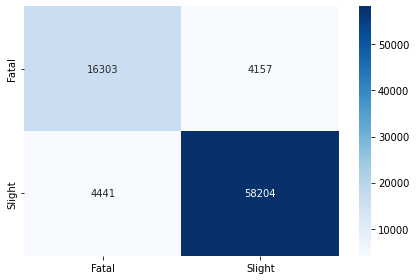






Classifier:  Logistic Regression
F1 Score:  0.836389493417225 

Accuracy:  0.7259009686541122 

Precision:  0.7574740457419405
Recall:  0.9336604608649637
Cross-Val Score:  0.7247312241555777 

Confusion matrix


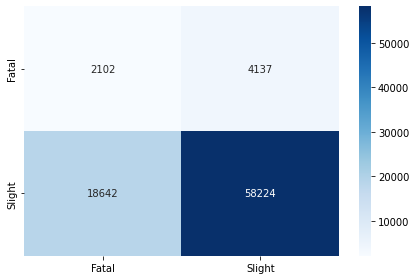






Classifier:  AdaBoostDT(lr=0.25)
F1 Score:  0.9314873240998706 

Accuracy:  0.8969295870685677 

Precision:  0.9292504504503037
Recall:  0.9337352939604346
Cross-Val Score:  0.8946457622451505 

Confusion matrix


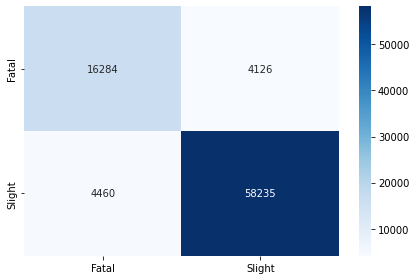






Classifier:  Random Forest
F1 Score:  0.9485845148249813 

Accuracy:  0.9260453642981769 

Precision:  0.9916047648732976
Recall:  0.909141931656003
Cross-Val Score:  0.9252397427420032 

Confusion matrix


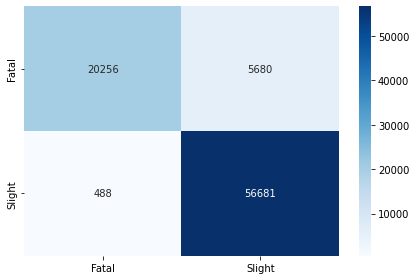






Classifier:  KNN (k=5)
F1 Score:  0.8980049994427373 

Accuracy:  0.8458335840202155 

Precision:  0.8916731222234519
Recall:  0.9044274466413303
Cross-Val Score:  0.8446593889239598 

Confusion matrix


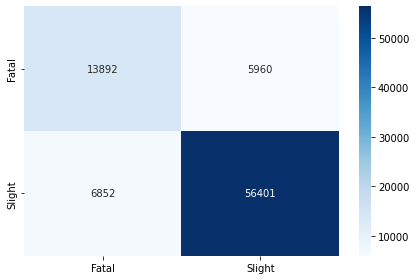






Classifier:  MLP (Activation=relu)
F1 Score:  0.9187119284622769 

Accuracy:  0.8820929346409162 

Precision:  0.9507294067647517
Recall:  0.8892363282607185
Cross-Val Score:  0.8654091438523016 

Confusion matrix


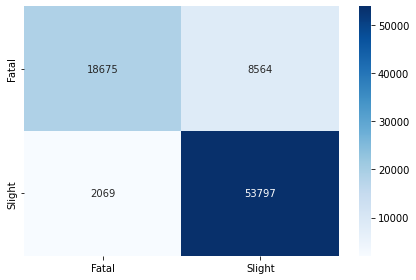






Classifier:  Boosted Forest
F1 Score:  0.9485234323722346 

Accuracy:  0.9259731664761447 

Precision:  0.9917702010857946
Recall:  0.9088907062640645
Cross-Val Score:  0.9251864065995294 

Confusion matrix


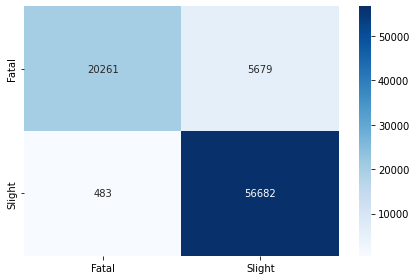






Classifier:  NBC
F1 Score:  0.8882723418268638 

Accuracy:  0.8367005595331207 

Precision:  0.9127470221981592
Recall:  0.8650759288657975
Cross-Val Score:  0.8360004006818758 

Confusion matrix


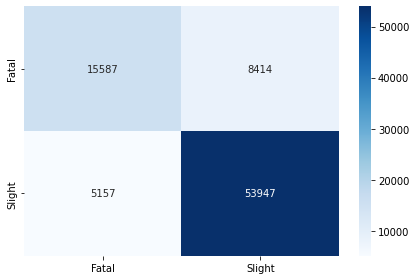






Classifier:  Voting
F1 Score:  0.9453787815125647 

Accuracy:  0.920955417844895 

Precision:  0.981779679712612
Recall:  0.9115846977010205
Cross-Val Score:  0.9201190111580875 

Confusion matrix


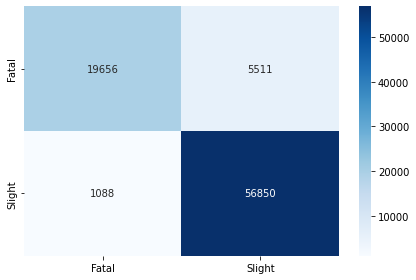








Best F1 Score is:  0.9458311117035456
From the  Decision Tree classifier
Best Cross-Val-Score is:  0.9252397427420032
From the  Random Forest classifier


Decision Tree ::  T Statistic =  -1.2032991918322888 P Value =  0.26325783954691845
Logistic Regression ::  T Statistic =  6.496104155211241 P Value =  0.00018887809565694172
AdaBoostDT(lr=0.25) ::  T Statistic =  -1.2376462915584863 P Value =  0.25093795201001506
Random Forest ::  T Statistic =  -2.628060830561869 P Value =  0.03026918166144578
KNN (k=5) ::  T Statistic =  1.4852753715036824 P Value =  0.1757729781058585
MLP (Activation=relu) ::  T Statistic =  -0.19869807359529318 P Value =  0.8474556946802609
Boosted Forest ::  T Statistic =  -2.6230933518840835 P Value =  0.03050357178840948
NBC ::  T Statistic =  2.276775499789516 P Value =  0.052334056908981706
Voting ::  T Statistic =  -2.36735728707241 P Value =  0.045433445587245276


In [ ]:
# DATA CLASS IMBALANCES
# 189016 slight
# 62815 Fatal

import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_1samp



from google.colab import drive
drive.mount('/content/gdrive')

# Read a data file in csv format, separate into features and class arrays
def read_data():
   data = pd.read_csv('/content/gdrive/My Drive/Accidents_categorical.csv') 
   data = data.values.tolist()
   X = []
   y = []
   for i in range(len(data) - 1):
      X.append(data[i][:-1])   # features are all values but the last on the line
      y.append(data[i][-1])    # class is the last value on the line
   return X, y

def plot_confusionmatrix(newlabels,y_test):
  print(f'Confusion matrix')
  cf = confusion_matrix(newlabels,y_test)
  classes = ['Fatal', 'Slight']
  sns.heatmap(cf,annot=True,yticklabels=classes
              ,xticklabels=classes,cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

#def plot_metrics(predict_proba, testy):
  

if __name__ == "__main__":
  #read in csv file
  X, y = read_data() 

  #transform data by encoding strings
  enc = OrdinalEncoder()
  enc = enc.fit_transform(X)

  #enc = OneHotencoder()
  #enc.fit_transform(X)

  #Classifiers
  clf1 = DecisionTreeClassifier(criterion='entropy')
  clf2 = LogisticRegression(multi_class='auto', solver='lbfgs')
  clf3 = AdaBoostClassifier(clf1, learning_rate=0.25)
  clf4 = RandomForestClassifier(n_estimators=100)
  clf5 = KNeighborsClassifier()
  clf6 = MLPClassifier(activation='relu', early_stopping=True)
  clf7 = AdaBoostClassifier(clf4, learning_rate=0.25)
  clf8 = GaussianNB()
  clf10 = VotingClassifier(estimators=[('clf1',clf1), ('clf2', clf2), ('clf3', clf3), ('clf4', clf4), ('clf5', clf5), ('clf6', clf6), ('clf7', clf7), ('clf8', clf8)])

  classifiers = [
    (clf1, "Decision Tree"),
    (clf2, "Logistic Regression"),
    (clf3, "AdaBoostDT(lr=0.25)"),
    (clf4, "Random Forest"),
    (clf5, "KNN (k=5)"),
    (clf6, "MLP (Activation=relu)"),
    (clf7, "Boosted Forest"),
    (clf8, "NBC"),
    (clf10, "Voting")
  ]

  #Tracking all F1 scores to determine which alg performs best
  AllF1 = []
  cvs = []

  #training classifiers on the normal dataset
  for clf, name in classifiers:
    F1_Scores = []
    acc_scores = []
    prec_scores = []
    rec_scores = []
    print("Classifier: ", name)
    for i in range(3):
      #Splitting data to train and test data using encoded data
      X_train, X_test, y_train, y_test = train_test_split(enc, y, test_size=0.33, random_state=3)
      clf.fit(X_train, y_train)
      newlabels = clf.predict(X_test)
      acc_scores.append(metrics.accuracy_score(y_test, newlabels))
      F1_Scores.append(metrics.f1_score(y_test, newlabels, pos_label="Slight"))
      prec_scores.append(metrics.precision_score(y_test, newlabels, pos_label="Slight"))
      rec_scores.append(metrics.recall_score(y_test, newlabels, pos_label="Slight"))
    AllF1.append(np.mean(F1_Scores))
    cv = np.mean(cross_val_score(clf, X_train, y_train))
    cvs.append(cv)
    print("F1 Score: ", np.mean(F1_Scores), "\n")
    print("Accuracy: ", np.mean(acc_scores), "\n")
    print("Precision: ", np.mean(prec_scores))
    print("Recall: ", np.mean(rec_scores))
    print("Cross-Val Score: ", cv, "\n")
    plot_confusionmatrix(newlabels, y_test)
    print("\n\n\n\n")


  print("\n\nBest F1 Score is: ", max(F1_Scores))
  print("From the ", classifiers[F1_Scores.index(max(F1_Scores))][1], "classifier")

  print("Best Cross-Val-Score is: ", max(cvs))
  print("From the ", classifiers[cvs.index(max(cvs))][1], "classifier\n\n")


  for i in range(len(AllF1)):
    t_score, p_value = ttest_1samp(AllF1, AllF1[i])
    print(classifiers[i][1], "::  T Statistic = ", t_score, "P Value = ", p_value)


In [ ]:
import math
import copy
import numpy as np
import collections
import random
from random import sample
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix

from google.colab import drive
drive.mount('/content/gdrive')

class TreeNode:
    def __init__(self, majClass):
        self.split_feature = -1
        self.children = {} 
        self.majority_class = majClass
        
def build_tree(examples):
    features = {}
    for feature_index in range(len(examples[0]) - 1):
        features[feature_index] = set([example[feature_index] for example in examples])
    return build_tree_1(examples, features)
    
def build_tree_1(examples, features):
    tree_node = TreeNode(majority_class(examples))
    if same_class(examples):
        return tree_node
    if not features:
        return tree_node
    best_feature_index = best_feature(features, examples)
    tree_node.split_feature = best_feature_index
    remaining_features = features.copy()
    remaining_features.pop(best_feature_index)
    for feature_value in features[best_feature_index]:
        split_examples = filter_examples(examples, best_feature_index, feature_value)
        tree_node.children[feature_value] = build_tree_1(split_examples, remaining_features)
    return tree_node

def majority_class(examples):
    return "S"

def same_class(examples):
    classes = [example[-1] for example in examples]
    return (len(set(classes)) == 1)

def best_feature(features, examples):
    best_feature_index = -1
    best_entropy = 2.0 
    for feature_index in features:
        se = split_entropy(feature_index, features, examples)
        if se < best_entropy:
            best_entropy = se
            best_feature_index = feature_index
    return best_feature_index

def split_entropy(feature_index, features, examples):
    se = 0.0
    for feature_value in features[feature_index]:
        split_examples = filter_examples(examples, feature_index, feature_value)
        if len(examples) != 0:
          se += (float(len(split_examples)) / float(len(examples))) * entropy(split_examples)
    return se

def entropy(examples):
    classes = [example[-1] for example in examples]
    classes_set = set(classes)
    class_counts = [classes.count(c) for c in classes_set]
    e = 0.0
    class_sum = sum(class_counts)
    for class_count in class_counts:
        if class_count > 0:
            class_frac = float(class_count) / float(class_sum)
            e += (-1.0)* class_frac * math.log(class_frac, 2.0)
    return e

def filter_examples(examples, feature_index, feature_value):
    return list(filter(lambda example: example[feature_index] == feature_value, examples))

def print_tree(tree_node, feature_names, depth = 1):
    indent_space = depth * "  "
    if tree_node.split_feature == -1: 
        print(indent_space + feature_names[-1] + ": " + tree_node.majority_class)
    else:
        for feature_value in tree_node.children:
            print(indent_space + feature_names[tree_node.split_feature] + " == " + feature_value)
            child_node = tree_node.children[feature_value]
            if child_node:
                print_tree(child_node, feature_names, depth+1)
            else:
                print(indent_space + "  " + feature_names[-1] + ": " + tree_node.majority_class)

def classify(tree_node, instance):
    if tree_node.split_feature == -1:
        return tree_node.majority_class
    child_node = tree_node.children[instance[tree_node.split_feature]]
    if child_node:
        return classify(child_node, instance)
    else:
        return tree_node.majority_class

def makeDiscrete(data):
  midPoint = len(data) / 2
  sortedValues = copy.copy(data) 
  sortedValues.sort()
  threshold = sortedValues[int(midPoint)]

  binnedData = np.zeros(len(data), dtype=int)

  for i in range(len(data)): 
    if (data[i] <= threshold):
      binnedData[i]=0 
    else:
        binnedData[i]=1 
  return binnedData


if __name__ == "__main__":
   random.seed()
   
   dataFrame = pd.read_csv('/content/gdrive/My Drive/Accidents_categorical.csv')
   data = dataFrame.to_numpy()
  
   examples = np.zeros(np.shape(data), dtype=str)
   for i in range(len(data[0])-1):
     examples[:,i] = makeDiscrete(data[:,i])

   for i in range(len(data)):
     examples[i][len(data[0])-1] = str(data[i][len(data[0])-1])
   
   print(examples)
   
   sampleData = []
   output = []
   numberOfTrials = 10

   for trials in range(numberOfTrials):
      count = 0

      for i in range(1, 500, 50):
         testSet = sample(list(examples), 100)
         trainSet = sample(list(examples), i)
         tree = build_tree(trainSet)
         right = 0

         for j in range(100):
            testClass = classify(tree, testSet[j])
            if testClass == testSet[j][len(data[0])-1]:
               right += 1
         if trials == 0:
            sampleData.append(i)
            output.append(right)
         else:
            output[count] += right
         count += 1


   for i in range(len(output)):
      output[i] = output[i] / float(numberOfTrials)
    
   print("Decision Tree Accuracy is: ", np.mean(output))
    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[['0' '0' '1' ... '1' '0' 'S']
 ['0' '0' '1' ... '1' '0' 'S']
 ['0' '0' '1' ... '0' '0' 'S']
 ...
 ['1' '1' '0' ... '1' '0' 'F']
 ['1' '1' '0' ... '1' '0' 'F']
 ['1' '1' '0' ... '0' '0' 'F']]
Decision Tree Accuracy is:  75.03999999999999
